In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Raw/full_data.csv')#.sample(10000)
df['Date'] = pd.to_datetime(df['Date'])

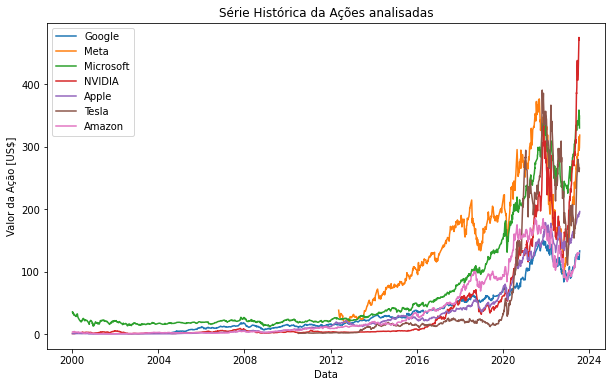

In [2]:
#-- Dados históricos
plt.figure(figsize=(10,6))
sns.lineplot(data=df,y='Close', x='Date', hue='Empresa')
plt.title(f'Série Histórica da Ações analisadas')
plt.ylabel('Valor da Ação [US$]')
plt.xlabel('Data')
plt.legend()
plt.savefig(f'../Figure/Série histórica.png', format='png', dpi=1000)
plt.show()


In [8]:
df.Empresa.value_counts().sum()

34604

In [7]:
df.groupby('Empresa').agg({'Date':[ 'min', 'max'] })

Date           
                 min        max
Empresa                        
Amazon    2000-01-03 2023-07-31
Apple     2000-01-03 2023-07-31
Google    2004-08-19 2023-07-31
Meta      2012-05-18 2023-07-31
Microsoft 2000-01-03 2023-07-31
NVIDIA    2000-01-03 2023-07-31
Tesla     2010-06-29 2023-07-31

In [4]:
df.Empresa.unique()

array(['NVIDIA', 'Microsoft', 'Tesla', 'Amazon', 'Apple', 'Google',
       'Meta'], dtype=object)

In [5]:
#-- Describe dos dados
temp = 'Meta'
display(df[df.Empresa == temp][['Close','Volume']].describe())
display(df[df.Empresa == temp]['Date'].describe())

,Close,Volume
count,794.000000,7.940000e+02
mean,151.290038,3.046083e+07
std,87.066010,2.368694e+07
min,18.980000,7.195700e+06
25%,77.567503,1.654910e+07
50%,153.565002,2.305330e+07
75%,195.917503,3.469440e+07
max,380.660004,2.398240e+08


/var/folders/_x/s_lht6nn48106mb_bl684__r0000gn/T/ipykernel_18375/2056470114.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df[df.Empresa == temp]['Date'].describe())


count                     794
unique                    794
top       2017-03-28 00:00:00
freq                        1
first     2012-05-22 00:00:00
last      2023-07-28 00:00:00
Name: Date, dtype: object

,Date,Close,Dif,Volume,Empresa,Symbol,target,moment,Action,coef_3,coef_7,coef_10,coef_15,coef_20,coef_30
3627,2019-03-01,0.364619,-1.165549,-0.626074,Google,GOOG,0,hold,0,-0.194459,-0.457339,-0.008265,-0.044635,0.217067,-0.285698
3628,2019-03-04,0.366929,-0.053046,-0.626631,Google,GOOG,0,hold,0,-1.183414,-0.640517,-0.344651,-0.105591,0.122085,-0.336150
3629,2019-03-05,0.371756,-0.865584,-0.626994,Google,GOOG,0,hold,0,-0.363504,-0.975431,-0.750526,-0.164551,-0.088990,-0.413647
3630,2019-03-06,0.370341,0.343028,-0.671544,Google,GOOG,0,hold,0,-0.790135,-1.270326,-1.167428,-0.455926,-0.413120,-0.448674
3631,2019-03-07,0.365403,0.910200,-0.662826,Google,GOOG,0,hold,0,0.267814,-1.237434,-1.160692,-0.672075,-0.570568,-0.471881


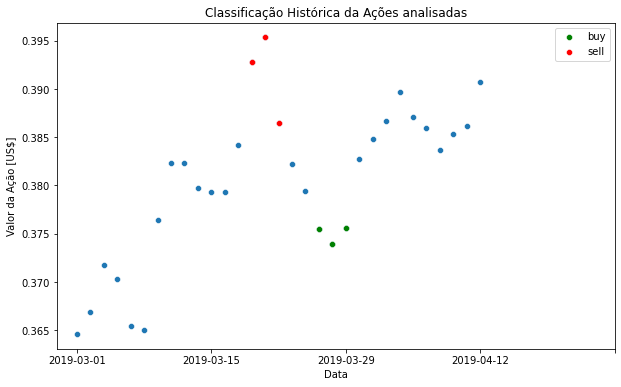

In [6]:
#-- Exemplo de segmentação inicial
df_class = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Train/google_train.csv')
df_class = df_class[(df_class.Empresa == 'Google') & (df_class.Date >= '2019-03-01') & (df_class.Date <= '2019-04-12')].copy()
display(df_class.head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_class,y='Close', x='Date')
sns.scatterplot(data=df_class[df_class.moment == 'buy'],y='Close', x='Date', color='g', label='buy')
sns.scatterplot(data=df_class[df_class.moment == 'sell'],y='Close', x='Date', color='r', label='sell')

dates_list = df_class['Date'].to_list()

plt.xticks(np.arange(0, 50, 10))
plt.title(f'Classificação Histórica da Ações analisadas')
plt.ylabel('Valor da Ação [US$]')
plt.xlabel('Data')
plt.legend()
plt.savefig(f'../Figure/Inversão de Tendência.png', format='png', dpi=1000)
plt.show()

,Date,Close,Dif,Volume,Empresa,Symbol,target,moment,Action,coef_3,coef_7,coef_10,coef_15,coef_20,coef_30
3587,2019-01-02,0.332348,-2.125883,-0.615413,Google,GOOG,0,hold,0,0.112574,-1.714475,-0.480131,0.619889,0.942164,0.587491
3588,2019-01-03,0.322243,1.821752,-0.575449,Google,GOOG,0,hold,0,-0.560720,-1.190208,-0.917894,0.348447,0.588668,0.536075
3589,2019-01-04,0.340780,-2.769500,-0.542700,Google,GOOG,0,hold,0,1.740889,0.495833,-0.887285,0.173199,0.587593,0.647862
3590,2019-01-07,0.339993,0.232365,-0.557209,Google,GOOG,0,hold,0,-3.114164,-0.243173,-1.304443,-0.383358,0.260828,0.623280
3591,2019-01-08,0.342670,-0.006447,-0.585320,Google,GOOG,0,hold,0,0.161446,-0.817675,-1.096546,-0.771148,0.092987,0.582707


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


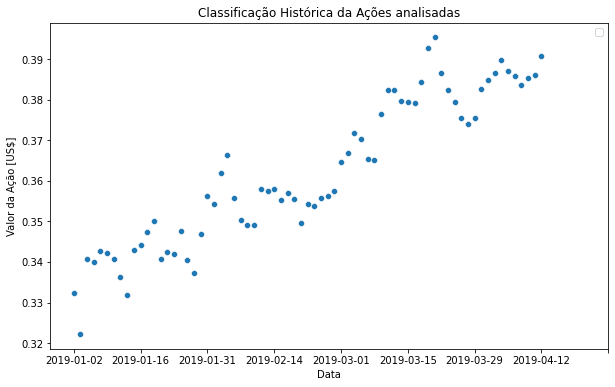

In [9]:
#-- Exemplo de segmentação inicial
df_class = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Train/google_train.csv')
df_class = df_class[(df_class.Empresa == 'Google') & (df_class.Date >= '2019-0-01') & (df_class.Date <= '2019-04-12')].copy()
display(df_class.head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_class,y='Close', x='Date')
# sns.scatterplot(data=df_class[df_class.moment == 'buy'],y='Close', x='Date', color='g', label='buy')
# sns.scatterplot(data=df_class[df_class.moment == 'sell'],y='Close', x='Date', color='r', label='sell')

dates_list = df_class['Date'].to_list()

plt.xticks(np.arange(0, 90, 10))
plt.title(f'Classificação Histórica da Ações analisadas')
plt.ylabel('Valor da Ação [US$]')
plt.xlabel('Data')
plt.legend()
plt.savefig(f'../Figure/Dados Crescente.png', format='png', dpi=1000)
plt.show()

,Date,Close,Dif,Volume,Empresa,Symbol,target,moment,Action,coef_3,coef_7,coef_10,coef_15,coef_20,coef_30
3870,2020-02-18,0.493066,-0.334079,-0.668772,Google,GOOG,1,sell,1,-0.321532,-0.828768,-1.642365,-1.274630,-0.592346,-0.942591
3871,2020-02-19,0.495448,-0.112021,-0.690976,Google,GOOG,1,sell,1,0.089579,-0.265509,-1.335792,-1.336261,-0.802018,-0.916924
3872,2020-02-20,0.492551,0.286235,-0.671894,Google,GOOG,1,sell,1,-0.375585,-0.313496,-0.919174,-1.421433,-1.031724,-0.884843
3873,2020-02-21,0.481344,1.674678,-0.589621,Google,GOOG,0,hold,0,0.519079,-0.064378,-0.580372,-1.365147,-1.210387,-0.838701
3874,2020-02-24,0.459798,0.335018,-0.442537,Google,GOOG,0,hold,0,1.927757,0.632818,0.210544,-0.878945,-1.145255,-0.737763


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


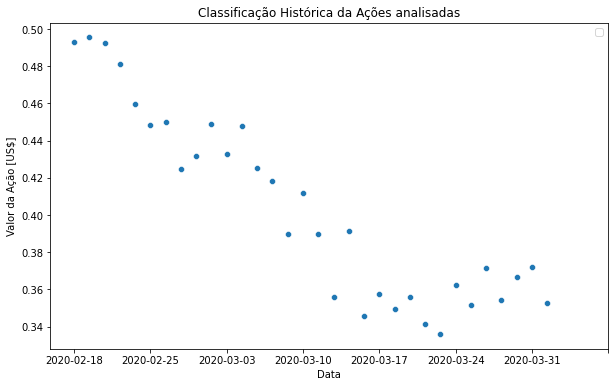

In [15]:
#-- Exemplo de segmentação inicial
df_class = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Train/google_train.csv')
df_class = df_class[(df_class.Empresa == 'Google') & (df_class.Date >= '2020-02-18') & (df_class.Date <= '2020-04-01')].copy()
display(df_class.head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_class,y='Close', x='Date')
# sns.scatterplot(data=df_class[df_class.moment == 'buy'],y='Close', x='Date', color='g', label='buy')
# sns.scatterplot(data=df_class[df_class.moment == 'sell'],y='Close', x='Date', color='r', label='sell')

dates_list = df_class['Date'].to_list()

plt.xticks(np.arange(0, 40, 5))
plt.title(f'Classificação Histórica da Ações analisadas')
plt.ylabel('Valor da Ação [US$]')
plt.xlabel('Data')
plt.legend()
plt.savefig(f'../Figure/Dados Descrescente.png', format='png', dpi=1000)
plt.show()

In [10]:
#-- Describe do Target
df_class = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Main/full_main.csv')
display(df_class.head())



,Date,Close,Mean,Dif,Volume,Empresa,Symbol,target,moment,Action,coef_3,coef_7,coef_10,coef_15,coef_20,coef_30
0,2000-02-15,0.901846,0.867901,-0.028419,485744000,Apple,AAPL,0,hold,0,-0.053524,0.001895,-0.011857,-0.005862,-0.001594,-0.004167
1,2000-02-16,0.864901,0.881479,0.027472,378246400,Apple,AAPL,0,hold,0,-0.024157,-0.005508,-0.009371,-0.008672,-0.002540,-0.004758
2,2000-02-17,0.870585,0.879111,0.002368,289497600,Apple,AAPL,0,hold,0,0.036946,-0.006726,-0.004713,-0.010085,-0.003660,-0.005116
3,2000-02-18,0.843113,0.859533,0.025578,233441600,Apple,AAPL,0,hold,0,-0.005684,-0.005670,-0.002029,-0.009432,-0.004571,-0.004972
4,2000-02-22,0.862532,0.858743,-0.027946,422296000,Apple,AAPL,0,hold,0,0.027472,-0.001042,-0.000474,-0.008082,-0.004328,-0.004816


In [18]:
df = pd.read_csv('/Users/cora/Documents/mba_uspesalq_tcc/Dataset/Main/full_main.csv')

In [19]:
df.moment.value_counts()

hold     28158
buy       3141
sell      3059
error       36
Name: moment, dtype: int64